# LOGISTIC REGRESSION

## Introduction to the problem statement
Diabetes is a chronic health condition characterized by elevated levels of glucose in the blood, either due to insufficient insulin production or ineffective utilization of insulin by the body. It encompasses various types, with Type 1 diabetes resulting from the immune system attacking insulin-producing cells, and Type 2 diabetes stemming from a combination of genetic predisposition and lifestyle factors. Symptoms include frequent urination, increased thirst, and unexplained weight loss. If left unmanaged, diabetes can lead to severe complications such as heart disease, kidney failure, and blindness. Proper management involves medication, diet control, exercise, and regular monitoring of blood sugar levels.

## importing necessary library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Data preprations:
This diabetes data is collected from internet. This dataset contains 8 independent factor which causes Diabetes in different age group. The goal of this machine learning model is to build a logistic regression model to predict outcome among patients.

In [2]:
df = pd.read_csv(r"C:\Users\sudis\Downloads\Datasets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [3]:
print(f"shape of the Datasets: {df.shape}")

shape of the Datasets: (768, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## variables
The Dataset contain different 8 independent variable and one outcome variable 
PREGNANCIES: Pregnancy can pose unique challenges for women with diabetes. High blood sugar levels can affect the developing baby, increasing the risk of birth defects and complications. Close monitoring of blood sugar levels, adherence to a healthy diet, regular exercise, and proper medical care are essential for a safe pregnancy.

GLUCOSE : Glucose: The Fuel for the Body. 
Glucose is a vital source of energy for the body's cells, especially the brain. In diabetes, the regulation of glucose levels is disrupted, leading to elevated blood sugar. Monitoring glucose levels is crucial for managing diabetes, as it impacts overall health and well-being

BLOOD PRESSURE: People with diabetes are at higher risk of developing high blood pressure, which further increases the likelihood of heart disease, stroke, and other complications. Managing blood pressure through lifestyle changes, medication, and regular monitoring is essential for reducing these risks and promoting overall health.

SKIN THICKNESS: Diabetes can lead to changes in skin thickness and texture due to impaired circulation and nerve damage. This can manifest as thickened, dry, or itchy skin, particularly on the feet and hands. Proper skincare, regular moisturizing, and foot care are important to prevent complications such as ulcers and infections.

INSULIN: Insulin is a hormone produced by the pancreas that regulates glucose levels in the blood. In diabetes, either the body doesn't produce enough insulin (Type 1) or it becomes resistant to its effects (Type 2). Insulin therapy is crucial for managing diabetes, helping to control blood sugar levels and prevent complications.

BMI: BMI is a measure of body fat based on height and weight. High BMI is associated with increased risk of Type 2 diabetes, as excess body fat can lead to insulin resistance. Maintaining a healthy BMI through diet and exercise can help prevent diabetes and its complications.

Diabetes Pedigree Function: The Diabetes Pedigree Function (DPF) is a tool used to assess the hereditary risk of developing diabetes within families. It evaluates the presence of diabetes among relatives, helping to estimate an individual's genetic predisposition to the disease. By analyzing family history, healthcare professionals can identify individuals at higher risk and implement preventive measures accordingly.

AGE: Age is a significant factor in the development of diabetes, particularly Type 2. As people age, their risk of developing insulin resistance increases due to changes in metabolism and lifestyle factors. It's essential to monitor blood sugar levels and adopt healthy habits, especially as age advances, to prevent or manage diabetes effectively."

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print(f"Total number of null values {df.isna().sum().sum()}")

Total number of null values 0


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

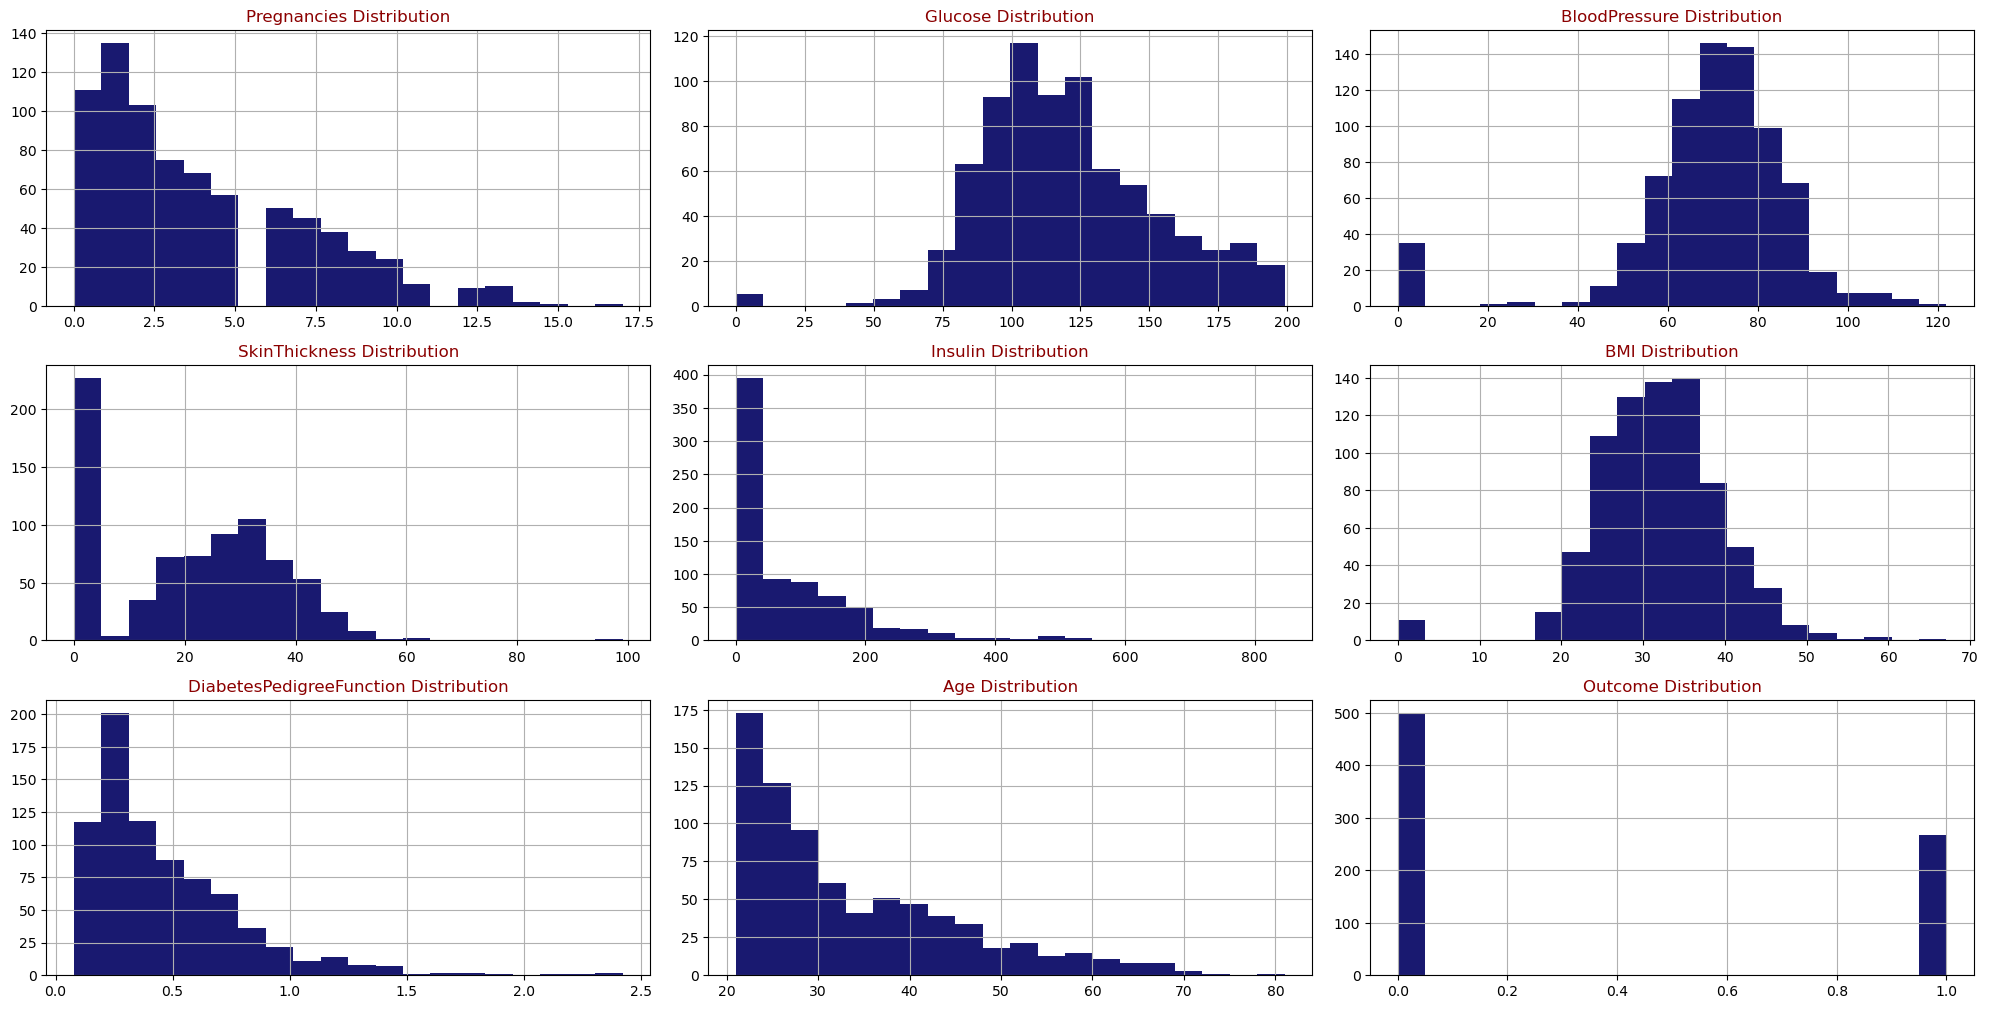

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

## Creating dependent and independent variable

In [9]:
x = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [12]:
print(f"Shape of independent variable: {x.shape}")
print(f"Shape of dependent variable: {y.shape}")

Shape of independent variable: (768, 8)
Shape of dependent variable: (768, 1)


## Creating train and test data 

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [14]:
print(f"shape of x_train: {x_train.shape}")
print(f"shape of x_test : {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"shape of y_test : {y_test.shape}")

shape of x_train: (614, 8)
shape of x_test : (154, 8)
Shape of y_train: (614, 1)
shape of y_test : (154, 1)


## model building 

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\sudis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sudis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## predicting outcome

In [16]:
y_pred = pd.DataFrame(log_reg.predict(x_test))

In [21]:
print("Accuracy score :", (log_reg.score(x_test,y_test)))

Accuracy score : 0.7792207792207793


## confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]], dtype=int64)

## decoding the cconfusion_matrix: 
The confusion matrix you provided is typically associated with evaluating the performance of a binary classifier, such as logistic regression, in predicting whether a person is diabetic or not. In this matrix, 337 represents the true negatives (correctly predicted non-diabetic individuals), 113 represents the true positives (correctly predicted diabetic individuals), 66 represents false negatives (diabetic individuals incorrectly classified as non-diabetic), and 99 represents false positives (non-diabetic individuals incorrectly classified as diabetic). This matrix aids in assessing the classifier's accuracy, precision, recall, and other performance metrics.

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

